In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [94]:
rv = sts.norm(loc=30, scale=5)
argus_ = sts.argus(1, loc=30, scale=5)

In [95]:
sample_rv = rv.rvs(size=1000)                             # Из списка scipy.stats выбрал 2 непрерывные функции для того, чтобы сравнить средние значения выборок их результатов размера n
sample_argus = argus_.rvs(size = 1000)

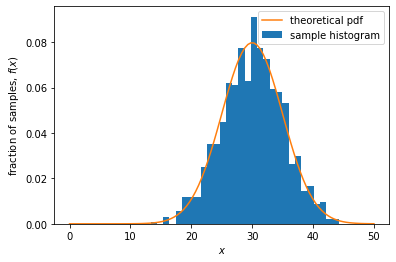

In [96]:
x = np.linspace(0,50,100)                                  # выборки нормальных непрерывных случайных переменных в исходном варианте напоминают нормальное распределение
pdf = rv.pdf(x)
plt.hist(sample_rv, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=1)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

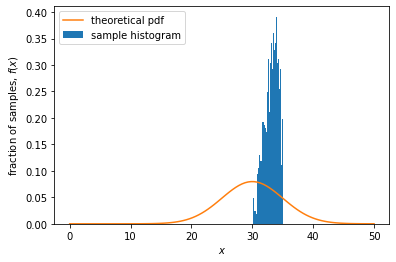

In [97]:
x1 = np.linspace(0,50,100)                      # выборки переменных с распределением argus не похожи на нормальное распределение
pdf = rv.pdf(x1)
plt.hist(sample_argus, density=True, bins=30, label='sample histogram')
plt.plot(x1, pdf, label='theoretical pdf', alpha=1)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [98]:
n1 = 2                # Размеры выборок 
n2 = 5
n3 = 10
n4 = 50

In [99]:
a1 = np.array([])     # Массивы для сохранения средних по выборкам

In [100]:
samples_count = 1000  # Количество повторов генерации

for number in range(samples_count): 
    sample1 = rv.rvs(size=n1)  
    a1 = np.append(a1, sample1.mean())               # На каждом цикле генерируем выборки указанных размеров

In [101]:
def rv_central_limit_theorem(sample_size:int, sample_count:int) -> np.ndarray:              # для удобства записал в  функцию
  rv = sts.norm(loc=30, scale=5)
  np_arr = np.array([])
  for number in range(sample_count): 
    sample = rv.rvs(size=sample_size)  
    np_arr = np.append(np_arr, sample.mean()) 
  return np_arr

def argus_central_limit_theorem(sample_size:int, sample_count:int) -> np.ndarray:
  argus_ = sts.argus(1, loc=30, scale=5)
  np_arr = np.array([])
  for number in range(sample_count): 
    sample = argus_.rvs(size=sample_size)  
    np_arr = np.append(np_arr, sample.mean()) 
  return np_arr

In [102]:
a2 = rv_central_limit_theorem(n2, samples_count)    # применил функции, создал выборки средних значений с использованием распределения norm и argus, размерами n1, n2, n3, n4
a3 = rv_central_limit_theorem(n3, samples_count)
a4 = rv_central_limit_theorem(n4, samples_count)

b1 = argus_central_limit_theorem(n1, samples_count)
b2 = argus_central_limit_theorem(n2, samples_count)
b3 = argus_central_limit_theorem(n3, samples_count)
b4 = argus_central_limit_theorem(n4, samples_count)

In [103]:
label_1 = 'sample of ' + str(n1) + ' histogram'   # Подписи для графиков
label_2 = 'sample of ' + str(n2) + ' histogram'
label_3 = 'sample of ' + str(n3) + ' histogram'
label_4 = 'sample of ' + str(n4) + ' histogram'


label_1_argus = 'sample of ' + str(b1) + ' histogram'
label_2_argus = 'sample of ' + str(b2) + ' histogram'
label_3_argus = 'sample of ' + str(b3) + ' histogram'
label_4_argus = 'sample of ' + str(b4) + ' histogram'


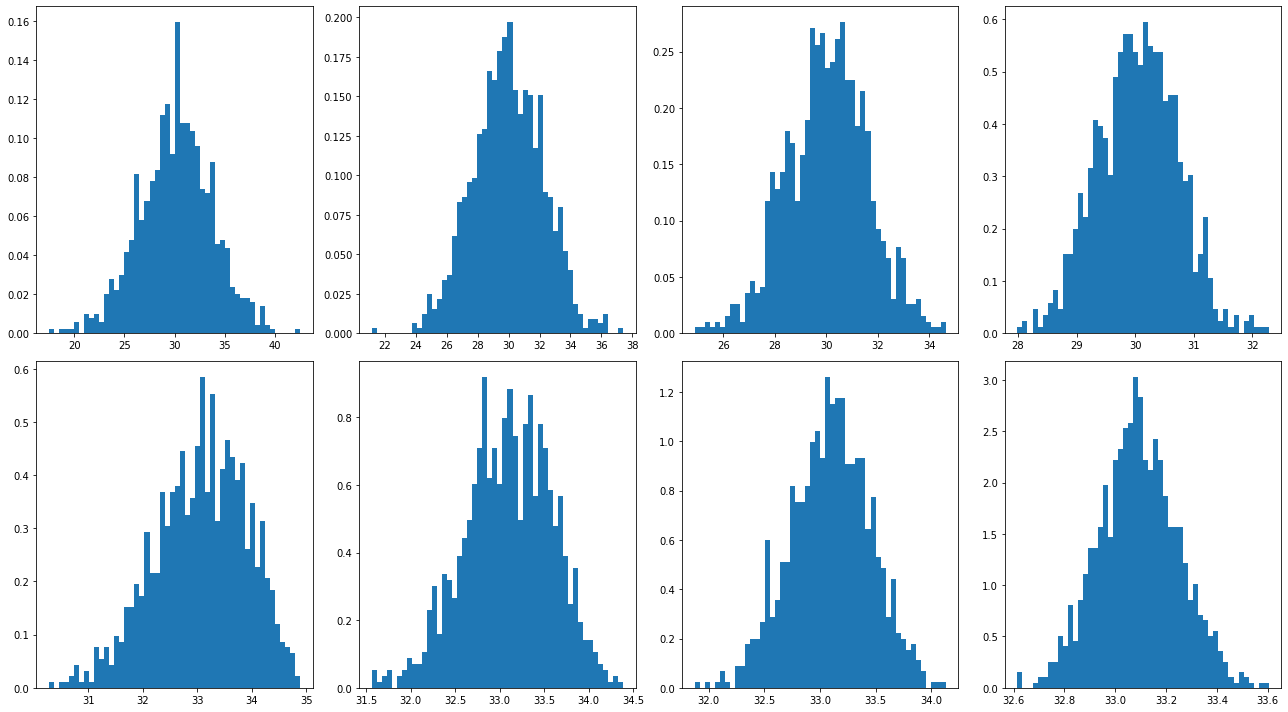

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,10))               #  графики средних значений выборок как распределения типа norm, так и распределения типа argus близки к нормальному распределению, что доказывает работоспособность ЦПТ
axes[0][0].hist(a1, density=True, label=label_1, bins=50)
axes[0][1].hist(a2, density=True, label=label_2, bins=50)
axes[0][2].hist(a3, density=True, label=label_3, bins=50)
axes[0][3].hist(a4, density=True, label=label_4, bins=50)

axes[1][0].hist(b1, density=True, label=label_1_argus, bins=50)
axes[1][1].hist(b2, density=True, label=label_2_argus, bins=50)
axes[1][2].hist(b3, density=True, label=label_3_argus, bins=50)
axes[1][3].hist(b4, density=True, label=label_4_argus, bins=50)
plt.tight_layout()
plt.show()
